# Data Source - List of Rocket Launch Sites (Wiki)

In [1]:
All_Data = '../Data/'
wikisites = All_Data + 'wiki_sites/'
Launch_Sites_Wiki_Data_xlx = wikisites + 'launchsites_wiki/launchsites_wiki_raw.xlsx'

In [2]:
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
raw_data_df = pd.read_excel(Launch_Sites_Wiki_Data_xlx,index_col=0)
raw_data_df.head()

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Continent
0,French Algeria,Centre interarmées d'essais d'engins spéciaux ...,31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W,1947–1967,230,18 000 kg,Orbital,Operated by France.[1],Africa
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E,1961–1965,10,NaN,NaN,NaN,Africa
2,Zaire,"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E,1977–1978,3,NaN,<50 km,German OTRAG rockets.[2],Africa
3,Egypt,Jabal Hamzah ballistic missile test and launch...,30°07′32.7″N 30°36′18.5″E﻿ / ﻿30.125750°N 30.6...,1962–1973,6,NaN,NaN,Testing SRBMs Al Zafir and Al Kahir[3][4],Africa
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E,1964–1988,27,20 000 kg,Orbital,"Scout rockets, operated by ASI and Sapienza Un...",Africa


In [4]:
# Using the very useful info method
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    117 non-null    object
 1   Location                   117 non-null    object
 2   Coordinates                117 non-null    object
 3   Operational date           112 non-null    object
 4   Number of rocket launches  59 non-null     object
 5   Heaviest rocket launched   44 non-null     object
 6   Highest achieved altitude  62 non-null     object
 7   Notes                      82 non-null     object
 8   Continent                  117 non-null    object
dtypes: object(9)
memory usage: 9.1+ KB


In [5]:
raw_data_df.columns.sort_values()

Index(['Continent', 'Coordinates', 'Country', 'Heaviest rocket launched',
       'Highest achieved altitude', 'Location', 'Notes',
       'Number of rocket launches', 'Operational date'],
      dtype='object')

## Analyzing and Transform Each column

## Launch Sites Per Continent Analysis

In [6]:
unique_continents = list(raw_data_df['Continent'].unique())
print(unique_continents)

Continents_Counts = []
Continents_Counts.append(list(raw_data_df['Continent']).count('Africa'))
Continents_Counts.append(list(raw_data_df['Continent']).count('Asia'))
Continents_Counts.append(list(raw_data_df['Continent']).count('Europe'))
Continents_Counts.append(list(raw_data_df['Continent']).count('North America'))
Continents_Counts.append(list(raw_data_df['Continent']).count('Oceania'))
Continents_Counts.append(list(raw_data_df['Continent']).count('South America'))
Continents_Counts.append(list(raw_data_df['Continent']).count('Laucnhes at Sea'))
print(Continents_Counts)
continent_counts_df = pd.DataFrame(columns=unique_continents)
df_length = len(continent_counts_df)
continent_counts_df.loc[df_length] = Continents_Counts
#rint(continent_counts_df.to_markdown())

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Laucnhes at Sea']
[8, 37, 27, 20, 8, 16, 1]



|   Africa |   Asia |   Europe |   North America |   South America |   Oceania |   Laucnhes at Sea |
|---------:|-------:|---------:|----------------:|----------------:|----------:|------------------:|
|        8 |     37 |       27 |              20 |               8 |        16 |                 1 |

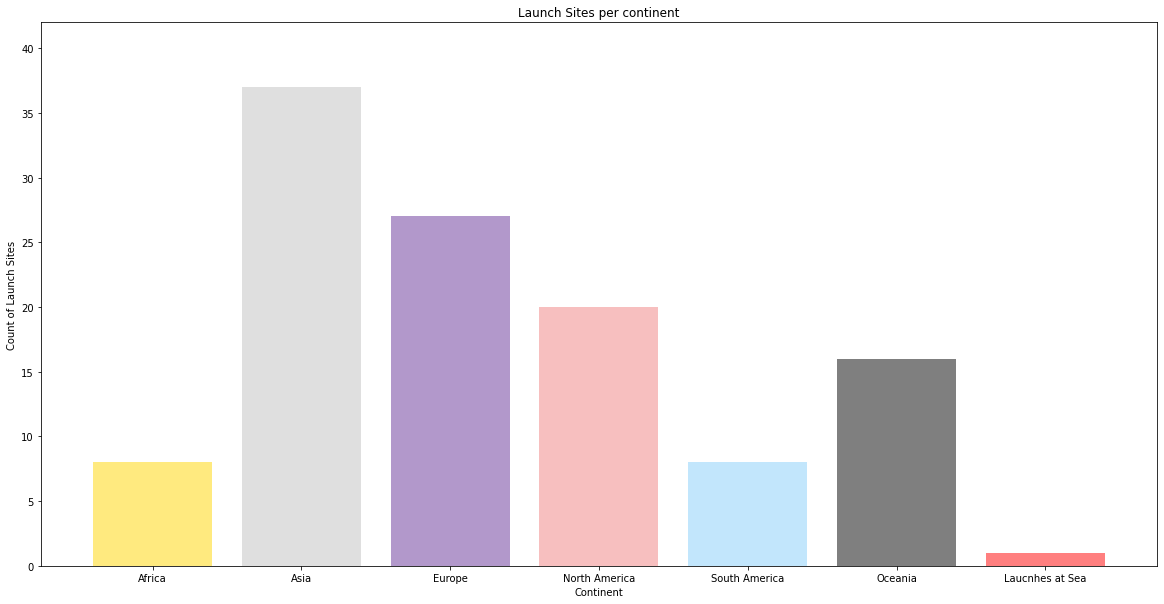

In [8]:
# Telling Matplotlib where we would like to place each of our x-axis headers
x_axis = np.arange(len(Continents_Counts))

colors = ["gold","silver","rebeccapurple","lightcoral","lightskyblue","black",'red']

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, unique_continents)
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Continents_Counts)+5)
# Labels and a title
plt.title("Launch Sites per continent")
plt.xlabel("Continent")
plt.ylabel("Count of Launch Sites")
plt.bar(x_axis, Continents_Counts, color=colors, alpha=0.5, align="center");

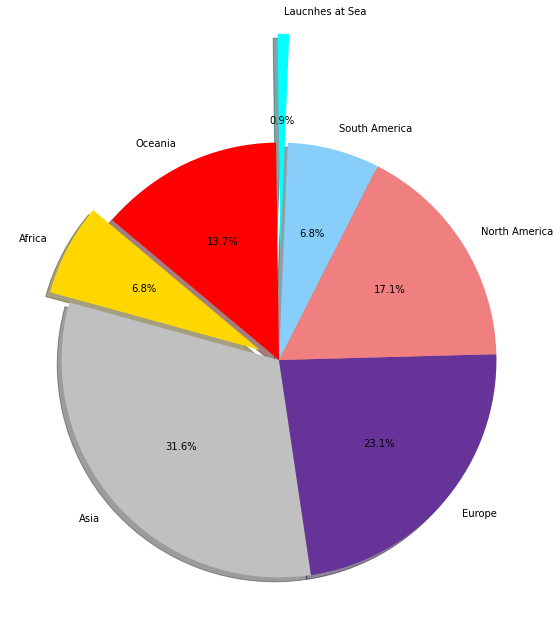

In [9]:
# Tells matplotlib to seperate the "Python" section from the others
unique_continents_pie = ['Africa','Asia','Europe','North America','South America','Laucnhes at Sea','Oceania']
Continents_pie = [8, 37, 27, 20, 8, 1, 16] 

labels = ['Africa','Asia','Europe','North America','South America','Laucnhes at Sea','Oceania']
colors = ["gold","silver","rebeccapurple","lightcoral","lightskyblue","cyan",'red'] 
explode = (0.1, 0, 0, 0, 0, 0.5, 0)
plt.pie(Continents_pie, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140);

## Coordinates


### Creating Individual Latitude and Longitude based coordinate system

In [10]:
raw_data_df['coordinates (dms)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[0])
raw_data_df['lat (dms)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[0].split(' ')[0])
raw_data_df['long (dms)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[0].split(' ')[1])
raw_data_df['coordinates (decimal)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[1])
raw_data_df['lat (decimal)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[1].split(' ')[1])
raw_data_df['long (decimal)'] = raw_data_df['Coordinates'].map(lambda x: str(x).split('/')[1].split(' ')[2])
raw_data_df['lat (decimal)'] = raw_data_df['lat (decimal)'].map(lambda x: '-' + x.split('°')[0].replace('\ufeff', '') if 'S' in x else x.split('°')[0].replace('\ufeff', ''))
raw_data_df['long (decimal)'] = raw_data_df['long (decimal)'].map(lambda x: '-' + x.split('°')[0].replace('\ufeff', '') if 'W' in x else x.split('°')[0].replace('\ufeff', ''))

# Launch Sites per country analysis

## Removing the '\xa0' characters

In [11]:
raw_data_df['Country'].unique()

array(['French Algeria', 'Algeria', 'Zaire', 'Egypt', 'Kenya', 'Libya',
       'Mauritania', 'South Africa', 'China', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Japan',
       'Soviet Union/\xa0Kazakhstan (Operated by Russia)',
       'Soviet Union/\xa0Kazakhstan', 'North Korea', 'South Korea',
       'Maldives', 'Pakistan', 'Soviet Union', 'Soviet Union/ Russia',
       'Russia', 'Taiwan', 'Bulgaria', 'France', 'Germany',
       'West Germany', 'Greece', 'Iceland', 'Italy', 'Norway',
       'Nazi-occupied Poland', 'Poland', 'Soviet Union/\xa0Russia',
       'Spain', 'Sweden', 'United Kingdom', 'Canada',
       'Greenland (\xa0Denmark)', 'United States', 'Argentina', 'Brazil',
       'French Guiana', 'Peru', 'Dutch Suriname', 'Australia',
       'Marshall Islands', 'New Zealand', 'Denmark'], dtype=object)

We see here that there are a few unique values that don't look right. For example, the Soviet Union/ Kazakhstan values should be just Kazakhstan, also there are some unicode errors such as having \xa0 in the string.

In [12]:
for i in raw_data_df['Country']:
    if '\xa0' in i:
        print(i)

Soviet Union/ Kazakhstan (Operated by Russia)
Soviet Union/ Kazakhstan
Soviet Union/ Russia
Soviet Union/ Russia
Soviet Union/ Russia
Greenland ( Denmark)


In [13]:
raw_data_df['Country'] = raw_data_df['Country'].map(lambda x:x.replace('\xa0','') if '\xa0' in x else x)

In [14]:
raw_data_df['Country'].unique()

array(['French Algeria', 'Algeria', 'Zaire', 'Egypt', 'Kenya', 'Libya',
       'Mauritania', 'South Africa', 'China', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Japan',
       'Soviet Union/Kazakhstan (Operated by Russia)',
       'Soviet Union/Kazakhstan', 'North Korea', 'South Korea',
       'Maldives', 'Pakistan', 'Soviet Union', 'Soviet Union/ Russia',
       'Russia', 'Taiwan', 'Bulgaria', 'France', 'Germany',
       'West Germany', 'Greece', 'Iceland', 'Italy', 'Norway',
       'Nazi-occupied Poland', 'Poland', 'Soviet Union/Russia', 'Spain',
       'Sweden', 'United Kingdom', 'Canada', 'Greenland (Denmark)',
       'United States', 'Argentina', 'Brazil', 'French Guiana', 'Peru',
       'Dutch Suriname', 'Australia', 'Marshall Islands', 'New Zealand',
       'Denmark'], dtype=object)

## Removing Soviet Union
Looks like in our Unique lists there are entries of launchsites operated by what used to be the Soviet Union and therefore needs to be removed.

In [15]:
raw_data_df['Country'] = raw_data_df['Country'].map(lambda x: x.split('/')[1].strip().split()[0] if '/' in x else x)

### Final Unique Values

In [16]:
# Here we want to know how many unique countries we have
print(f"We have {len(raw_data_df['Country'].unique())}, unique countries in our dataset")

We have 48, unique countries in our dataset


### Amount of LaunchSites Per Country

In [17]:
# Counting how many launch site each unique country has
unique_countries_list = raw_data_df['Country'].unique()

countries_counts = []
for country in unique_countries_list:
    countries_counts.append(list(raw_data_df['Country']).count(country))
print(countries_counts)

[1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 3, 1, 1, 6, 2, 2, 2, 1, 2, 2, 7, 1, 1, 1, 4, 2, 1, 1, 1, 3, 2, 1, 1, 4, 2, 4, 1, 15, 9, 3, 1, 2, 1, 5, 1, 2, 1]


### Counties with at least 2 LaunchSites

In [18]:
countries_names_2 = []
countries_counts_2 = []
for country in unique_countries_list:
    if list(raw_data_df['Country']).count(country) >= 2:
        countries_names_2.append(country)
        countries_counts_2.append(list(raw_data_df['Country']).count(country))
    else:
        continue
print(countries_counts_2)

[6, 3, 3, 6, 2, 2, 2, 2, 2, 7, 4, 2, 3, 2, 4, 2, 4, 15, 9, 3, 2, 5, 2]


In [19]:
more_than_two_df = pd.DataFrame()
more_than_two_df['countries'] = countries_names_2
more_than_two_df['counts'] = countries_counts_2

In [18]:
#print(more_than_two_df.to_markdown())

|    | countries            |   counts |
|---:|:---------------------|---------:|
|  0 | China                |        6 |
|  1 | India                |        3 |
|  2 | Iran                 |        3 |
|  3 | Japan                |        6 |
|  4 | Kazakhstan           |        2 |
|  5 | North Korea          |        2 |
|  6 | South Korea          |        2 |
|  7 | Pakistan             |        2 |
|  8 | Soviet Union         |        2 |
|  9 | Russia               |        7 |
| 10 | Germany              |        4 |
| 11 | West Germany         |        2 |
| 12 | Norway               |        3 |
| 13 | Nazi-occupied Poland |        2 |
| 14 | Sweden               |        4 |
| 15 | United Kingdom       |        2 |
| 16 | Canada               |        4 |
| 17 | United States        |       15 |
| 18 | Argentina            |        9 |
| 19 | Brazil               |        3 |
| 20 | Peru                 |        2 |
| 21 | Australia            |        5 |
| 22 | New Zealand          |        2 |

### Counties with at least 3 LaunchSites 

In [20]:
# We can further decrease the sample size to only countries with at least 3
# Launch sites
# Creating a separate list to store the country names
countries_counts_3 = []
countries_names_3 = []
threshold = 3

for country in unique_countries_list:
    if list(raw_data_df['Country']).count(country) >= threshold:
        countries_counts_3.append(list(raw_data_df['Country']).count(country))
        countries_names_3.append(country)
    else:
        continue
        
print(f"There are {len(countries_counts_3)} countries with at least {threshold} launch sites !")

There are 13 countries with at least 3 launch sites !


In [21]:
more_than_three_df = pd.DataFrame()
more_than_three_df['countries'] = countries_names_3
more_than_three_df['counts'] = countries_counts_3
#print(more_than_three_df.to_markdown())

|    | countries     |   counts |
|---:|:--------------|---------:|
|  0 | China         |        6 |
|  1 | India         |        3 |
|  2 | Iran          |        3 |
|  3 | Japan         |        6 |
|  4 | Russia        |        7 |
|  5 | Germany       |        4 |
|  6 | Norway        |        3 |
|  7 | Sweden        |        4 |
|  8 | Canada        |        4 |
|  9 | United States |       15 |
| 10 | Argentina     |        9 |
| 11 | Brazil        |        3 |
| 12 | Australia     |        5 |

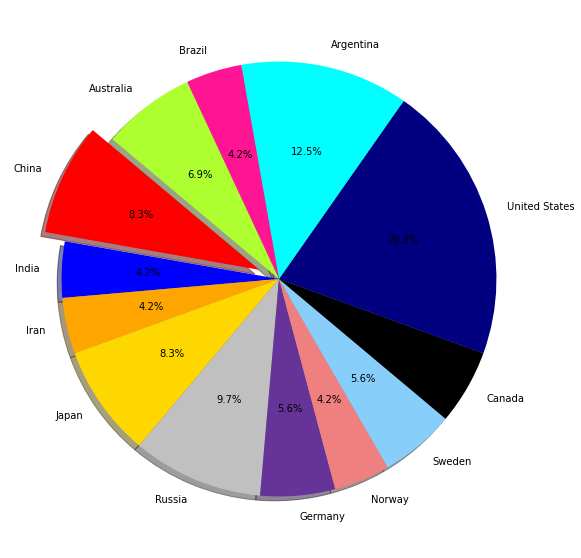

In [22]:
# Tells matplotlib to seperate the "Python" section from the others
labels = countries_names_3
colors = ["red","blue","orange","gold","silver","rebeccapurple",
          "lightcoral","lightskyblue","black","navy","cyan",
          "deeppink","greenyellow"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(countries_counts_3, explode=explode, labels=labels, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140);
plt.savefig('./plots/countries_more_than_3.png')

## Heaviest Rocket Launched

In [23]:
raw_data_df['Heaviest rocket launched'].describe()

count         44
unique        43
top       700 kg
freq           2
Name: Heaviest rocket launched, dtype: object

In [31]:
raw_data_df['Heaviest rocket launched'] = raw_data_df['Heaviest rocket launched'].map(lambda x:x.replace('\xa0','') if isinstance(x,str) and '\xa0' in x else x)

In [32]:
raw_data_df['Heaviest rocket launched'].unique()

array(['18 000kg', nan, '20 000kg', '1 000kg', '464 000kg', '249 000kg',
       '459 000kg', '879 000kg', '690, 000kg', '765kg', '70 000kg',
       '139 000kg', '445 000kg', '2 400 000kg', '47 000kg', '211 000kg',
       '10 000kg', '475kg', '12 500kg', '130kg', '800kg', '16kg',
       '760 000kg', '30kg', '700kg', '12 400kg', '1300', '1 200kg',
       '3 000 000kg', '770kg', '86 000kg', '89 805kg', '7 076kg [82]',
       '933kg', '500kg', '3 400kg', '28kg', '6 737kg', '777 000kg',
       '2 000kg', '28 000kg', '39 000kg', '10 500kg', '1 630kg'],
      dtype=object)

In [33]:
#raw_data_df.loc[raw_data_df['Heaviest rocket launched']=='approx 1300\xa0kg plus payload']

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Continent,coordinates (dms),lat (dms),long (dms),coordinates (decimal),lat (decimal),long (decimal)


In [34]:
#raw_data_df.loc[71,'Heaviest rocket launched'] = '1300'

## Cleaning Values

In [35]:
raw_data_df['Heaviest rocket launched'] = raw_data_df['Heaviest rocket launched'].map(lambda x: int(x.split('kg')[0].replace(' ','').replace(',','')) if isinstance(x,str) else x)

In [36]:
raw_data_df['Heaviest rocket launched'].describe()

count    4.400000e+01
mean     2.487817e+05
std      5.953872e+05
min      1.600000e+01
25%      8.997500e+02
50%      1.145000e+04
75%      1.570000e+05
max      3.000000e+06
Name: Heaviest rocket launched, dtype: float64

In [61]:
remove_empty = raw_data_df['Heaviest rocket launched'].dropna()

In [60]:
raw_data_df['Heaviest rocket launched'].unique().shape

(44,)

## Highest achieved Orbit (altitude) Analysis

In [62]:
raw_data_df['Highest achieved altitude'].describe()

count          62
unique         38
top       Orbital
freq           15
Name: Highest achieved altitude, dtype: object

In [27]:
raw_data_df['Highest achieved altitude'] = raw_data_df['Highest achieved altitude'].map(lambda x:x.replace('\xa0','') if isinstance(x,str) and '\xa0' in x else x)

In [37]:
# Here we are checking the frequecies of each highest achieved orbit
raw_data_df['Highest achieved altitude'].unique()

array(['Orbital', nan, 50.0, 60.0, 'Lunar', 'Interplanetary', 100.0,
       343.0, 402.0, 1000.0, 300.0, 90.0, 4.0, 175.0, 110.0, 10.0, 80.0,
       114.0, 720.0, 135.0, 237.0, 717.0, 270.0, 'Interstellar', 160.0,
       112.0, 2.2, 550.0, 40.0, 25.0, 1100.0, 956.0, 590.0, 205.0, 120.0,
       85.0, 8.2], dtype=object)

In [38]:
raw_data_df['Highest achieved altitude'] = raw_data_df['Highest achieved altitude'].map(lambda x:x.replace('<','') if isinstance(x,str) and '<' in x else x)
raw_data_df['Highest achieved altitude'] = raw_data_df['Highest achieved altitude'].map(lambda x:x.replace('>','') if isinstance(x,str) and '>' in x else x)

In [39]:
raw_data_df['Highest achieved altitude'] = raw_data_df['Highest achieved altitude'].map(lambda x: float(x.split('km')[0].replace(' ','').replace(',','')) if isinstance(x,str) and 'km' in x else x)

In [40]:
raw_data_df['Highest achieved altitude'].unique()

array(['Orbital', nan, 50.0, 60.0, 'Lunar', 'Interplanetary', 100.0,
       343.0, 402.0, 1000.0, 300.0, 90.0, 4.0, 175.0, 110.0, 10.0, 80.0,
       114.0, 720.0, 135.0, 237.0, 717.0, 270.0, 'Interstellar', 160.0,
       112.0, 2.2, 550.0, 40.0, 25.0, 1100.0, 956.0, 590.0, 205.0, 120.0,
       85.0, 8.2], dtype=object)

In [41]:
raw_data_df['Highest achieved altitude'].describe()

count          62
unique         36
top       Orbital
freq           15
Name: Highest achieved altitude, dtype: object

## Number of Rocket Launches

In [42]:
raw_data_df['Number of rocket launches'].describe()

count     59
unique    53
top        2
freq       4
Name: Number of rocket launches, dtype: object

In [43]:
raw_data_df['Number of rocket launches'].unique()

array([230, 10, 3, 6, 27, nan, 1, '28', '>3000', '67', '371', '2',
       '>1200', '36', '139', '>1000', '>500', '1', '18', '150', '300',
       '0', '1 (2015)', '3500+', '17', '7', '~10', '5', '>30', '1600+',
       '7500+', '2000+', '1000+', '500+', '151', '50+', '26', '22', '20+',
       '3', '100 (approximately)', '11', '8', '233', '27', '35', '<200',
       '<65', '32', '4', 12, 2, 13, 4], dtype=object)

In [44]:
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('<','') if isinstance(x,str) and '<' in x else x)
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('>','') if isinstance(x,str) and '>' in x else x)

In [45]:
raw_data_df['Number of rocket launches'].unique()

array([230, 10, 3, 6, 27, nan, 1, '28', '3000', '67', '371', '2', '1200',
       '36', '139', '1000', '500', '1', '18', '150', '300', '0',
       '1 (2015)', '3500+', '17', '7', '~10', '5', '30', '1600+', '7500+',
       '2000+', '1000+', '500+', '151', '50+', '26', '22', '20+', '3',
       '100 (approximately)', '11', '8', '233', '27', '35', '200', '65',
       '32', '4', 12, 2, 13, 4], dtype=object)

In [46]:
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('+','') if isinstance(x,str) and '+' in x else x)

In [47]:
raw_data_df['Number of rocket launches'].unique()

array([230, 10, 3, 6, 27, nan, 1, '28', '3000', '67', '371', '2', '1200',
       '36', '139', '1000', '500', '1', '18', '150', '300', '0',
       '1 (2015)', '3500', '17', '7', '~10', '5', '30', '1600', '7500',
       '2000', '151', '50', '26', '22', '20', '3', '100 (approximately)',
       '11', '8', '233', '27', '35', '200', '65', '32', '4', 12, 2, 13, 4],
      dtype=object)

In [48]:
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('(2015)','') if isinstance(x,str) and '(2015)' in x else x)

In [49]:
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('(approximately)','') if isinstance(x,str) and '(approximately)' in x else x)

In [50]:
raw_data_df['Number of rocket launches'].unique()

array([230, 10, 3, 6, 27, nan, 1, '28', '3000', '67', '371', '2', '1200',
       '36', '139', '1000', '500', '1', '18', '150', '300', '0', '1 ',
       '3500', '17', '7', '~10', '5', '30', '1600', '7500', '2000', '151',
       '50', '26', '22', '20', '3', '100 ', '11', '8', '233', '27', '35',
       '200', '65', '32', '4', 12, 2, 13, 4], dtype=object)

In [51]:
raw_data_df['Number of rocket launches'] = raw_data_df['Number of rocket launches'].map(lambda x:x.replace('~','') if isinstance(x,str) and '~' in x else x)

In [52]:
raw_data_df['Number of rocket launches'].unique()

array([230, 10, 3, 6, 27, nan, 1, '28', '3000', '67', '371', '2', '1200',
       '36', '139', '1000', '500', '1', '18', '150', '300', '0', '1 ',
       '3500', '17', '7', '10', '5', '30', '1600', '7500', '2000', '151',
       '50', '26', '22', '20', '3', '100 ', '11', '8', '233', '27', '35',
       '200', '65', '32', '4', 12, 2, 13, 4], dtype=object)

In [53]:
raw_data_df.shape

(117, 15)

## Adding Rotational Velocity Column

In [54]:
import math

Earth_Radius = 6378137
earth_rotational_vel = (2*math.pi*Earth_Radius)/86164
earth_rotational_vel

465.1016281228644

In [55]:
raw_data_df['rotational_vel'] = raw_data_df['lat (decimal)'].map(lambda x: earth_rotational_vel*math.cos(math.radians(float(x))))
raw_data_df.head(3)

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Continent,coordinates (dms),lat (dms),long (dms),coordinates (decimal),lat (decimal),long (decimal),rotational_vel
0,French Algeria,Centre interarmées d'essais d'engins spéciaux ...,31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W,1947–1967,230,18000.0,Orbital,Operated by France.[1],Africa,31°05′58″N 2°50′09″W﻿,31°05′58″N,2°50′09″W﻿,﻿31.09951°N 2.83581°W,31.09951,-2.83581,398.253270
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E,1961–1965,10,NaN,NaN,NaN,Africa,26°43′08″N 0°16′37″E﻿,26°43′08″N,0°16′37″E﻿,﻿26.71895°N 0.27691°E,26.71895,0.27691,415.439347
2,Zaire,"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E,1977–1978,3,NaN,50.0,German OTRAG rockets.[2],Africa,7°55′33″S 28°31′40″E﻿,7°55′33″S,28°31′40″E﻿,﻿7.92587°S 28.52766°E,-7.92587,28.52766,460.658654


## Operational Date
### Creating Year Opened, Year Closed Columns

In [56]:
# Saw this one row in which the opened date was very long and decided to manually replace it
raw_data_df.loc[43,'Operational date'] = '2016'

In [57]:
raw_data_df['year opened'] = raw_data_df['Operational date'].map(lambda x: x.replace(' ','')[:4] if isinstance(x, str) else x)
#raw_data_df['year closed'] = raw_data_df['Operational date'].map(lambda x: x.replace(' ','')[5:] if (isinstance(x, str) and len(str(x)) > 5) and '[' not in x else 'operational')

In [58]:
raw_data_df['Operational date'] = raw_data_df['Operational date'].map(lambda x: str(x).replace('?','') if '?' in str(x) else x)
raw_data_df['Operational date'] = raw_data_df['Operational date'].map(lambda x: str(x).replace('s','') if 's' in str(x) else x)

In [206]:
#print(raw_data_df.loc[raw_data_df['year closed'] == '1974/2011–'])
#raw_data_df.loc[94, 'year closed'] = 'operational'

In [227]:
#raw_data_df.loc[94, 'year closed']

'1974/2011–'

In [66]:
sites_df = raw_data_df.dropna(subset=['year opened'])
sites_df.shape

(111, 17)

In [62]:
# Removed a site that was To be Announced
sites_df = sites_df.loc[~sites_df['year opened'].isin(['TBA'])]
sites_df.to_excel(wikisites + 'launchsites_wiki/launchsites_no_year_closed.xlsx')

## Creating Operation length Column

*Year closed column was created mannually due to some complications*

In [83]:
data_df = pd.read_excel(wikisites + 'launchsites_wiki/launchsites_year_closed.xlsx',index_col=0)
data_df.head()

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Continent,coordinates (dms),lat (dms),long (dms),coordinates (decimal),lat (decimal),long (decimal),rotational_vel,year opened,year closed
0,French Algeria,Centre interarmées d'essais d'engins spéciaux ...,31°05′58″N 2°50′09″W﻿ / ﻿31.09951°N 2.83581°W,1947–1967,230.0,18000.0,Orbital,Operated by France.[1],Africa,31°05′58″N 2°50′09″W﻿,31°05′58″N,2°50′09″W﻿,﻿31.09951°N 2.83581°W,31.09951,-2.835810,398.253270,1947,1967
1,Algeria,Reggane,26°43′08″N 0°16′37″E﻿ / ﻿26.71895°N 0.27691°E,1961–1965,10.0,NaN,NaN,NaN,Africa,26°43′08″N 0°16′37″E﻿,26°43′08″N,0°16′37″E﻿,﻿26.71895°N 0.27691°E,26.71895,0.276910,415.439347,1961,1965
2,Zaire,"Shaba North, Kapani Tonneo OTRAG Launch Center",7°55′33″S 28°31′40″E﻿ / ﻿7.92587°S 28.52766°E,1977–1978,3.0,NaN,50,German OTRAG rockets.[2],Africa,7°55′33″S 28°31′40″E﻿,7°55′33″S,28°31′40″E﻿,﻿7.92587°S 28.52766°E,-7.92587,28.527660,460.658654,1977,1978
3,Egypt,Jabal Hamzah ballistic missile test and launch...,30°07′32.7″N 30°36′18.5″E﻿ / ﻿30.125750°N 30.6...,1962–1973,6.0,NaN,NaN,Testing SRBMs Al Zafir and Al Kahir[3][4],Africa,30°07′32.7″N 30°36′18.5″E﻿,30°07′32.7″N,30°36′18.5″E﻿,﻿30.125750°N 30.605139°E,30.12575,30.605139,402.278464,1962,1973
4,Kenya,"Broglio Space Centre (San Marco), Malindi",2°56′27″S 40°12′48″E﻿ / ﻿2.94080°S 40.21340°E,1964–1988,27.0,20000.0,Orbital,"Scout rockets, operated by ASI and Sapienza Un...",Africa,2°56′27″S 40°12′48″E﻿,2°56′27″S,40°12′48″E﻿,﻿2.94080°S 40.21340°E,-2.94080,40.213400,464.489125,1964,1988


In [84]:
data_df['year closed'].isna().sum()

0

In [85]:
operation_time = []

for open_y, close_y in zip(data_df['year opened'], data_df['year closed']):
    if close_y == 'operational':
        operation_time.append(2021 - int(open_y))
    else:
        operation_time.append(int(close_y) - int(open_y))

In [86]:
data_df['operation length'] = operation_time
data_df['operation length'].describe()

count    111.000000
mean      25.459459
std       23.974526
min        0.000000
25%        4.000000
50%       19.000000
75%       49.500000
max       76.000000
Name: operation length, dtype: float64

In [79]:
data_df.iloc[61,3]

'1966–[citation needed]'

In [87]:
data_df.loc[data_df['operation length'] == 76]

,Country,Location,Coordinates,Operational date,Number of rocket launches,Heaviest rocket launched,Highest achieved altitude,Notes,Continent,coordinates (dms),lat (dms),long (dms),coordinates (decimal),lat (decimal),long (decimal),rotational_vel,year opened,year closed,operation length
80,United States,"Wallops Flight Facility, Delmarva Peninsula, V...",37°50′46″N 75°28′46″W﻿ / ﻿37.84621°N 75.47938°W,1945–,1600.0,NaN,NaN,Now operated by NASA's Goddard Space Flight Ce...,North America,37°50′46″N 75°28′46″W﻿,37°50′46″N,75°28′46″W﻿,﻿37.84621°N 75.47938°W,37.84621,-75.47938,367.272354,1945,operational,76
81,United States,"White Sands Missile Range, New Mexico",32°33′53″N 106°21′33″W﻿ / ﻿32.56460°N 106.35908°W,1945–,7500.0,NaN,NaN,Military and civilian flights. Served as alter...,North America,32°33′53″N 106°21′33″W﻿,32°33′53″N,106°21′33″W﻿,﻿32.56460°N 106.35908°W,32.56460,-106.35908,391.980729,1945,operational,76


In [88]:
data_df.to_excel(wikisites + 'launchsites_wiki/launchsites_transformed.xlsx')

## Interactive Map

The interactive map below was created from latitude and longitude values using the Tableau Public software obtained from Wikipedia's list of Rocket Launch Sites page [4]. This is a simple bubble heat map that has the geographic locations of all the launch sites in the world and the which had the most Rocket Launches. If you hover over individual bubbles you can see a field for the year that individual Launch site and a total number of rocket launch sites. During the business case study, the team can do further research on the cost of operabilition for each location and find out the reasons for some of them closing or still operating. Conclusions made will either make a case for or against Spaceport at an Equatorial location. For example, if we look at Spaceports in the Western Hemisphere, the White Sands Missile Range in New Mexico has over 7000 rocket launches to date but it's latitudinal location is at 32 degrees. On the other hand, the Guiana Space center with a latitudinal location of 5.2 only has 200 launches. Why is there such a huge difference in the two ? Maybe specific rockets for specific target orbits are being launched from one location compared to another ? Also if we take a look at the Peenemünde/Greifswalder Oie (54 degrees latitude), was launched from 3000 times. How is this number so high for a Spaceport so far from the Equator ?   Intuitively, one can also ask why it closed in 1945 while being used so frequently at such a early time in Spaceflight ? Was the reason it close an economic factor or other ? Keeping such questions in mind should help in the aid in the formation of further analysis.

Will Post on Githubpages
https://san-wang.github.io/blog/Embed-Tableau-dashboard-into-github-page-post/

Link: [Launch Site Analysis](https://public.tableau.com/shared/5MN2KZWQX?:display_count=n&:origin=viz_share_link)